# Loads bezier curve

In [2]:
import json
import sys
import os
from PIL import Image, ImageDraw

# import the library
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(root_dir)

from svglib.svg import SVG
from svglib.geom import Point

In [3]:
def show(svg_img, w=128, h=128):
    white_bg = Image.new("RGBA", (w, h), "WHITE")
    white_bg.paste(
        svg_img.draw(return_png=True, do_display=False), 
        (0, 0), 
        svg_img.draw(return_png=True, do_display=False)
        ) 
    white_bg.convert("RGB").show()

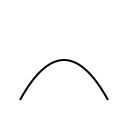

SVG[Bbox(0.0 0.0 128.0 128.0)](
	SVGPathGroup(SVGPath(M[P(0.0, 0.0), P(20.0, 100.0)] C[P(20.0, 100.0), P(49.333335876464844, 46.666664123535156), P(78.66666412353516, 46.666664123535156), P(108.0, 100.0)]))
)


In [4]:
sample_dir = os.path.join(root_dir, "samples")
svg = SVG.load_svg(os.path.join(sample_dir, "bezier.svg"))
show(svg)
print(svg)

SVG[Bbox(0.0 0.0 128.0 128.0)](
	SVGPathGroup(SVGPath(M[P(32.0, 32.0), P(42.0, 82.0)] C[P(42.0, 82.0), P(56.66666793823242, 55.33333206176758), P(71.33332824707031, 55.33333206176758), P(86.0, 82.0)]))
)


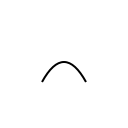

In [5]:
svg.scale(0.5)
print(svg)
show(svg)

SVG[Bbox(0.0 0.0 128.0 128.0)](
	SVGPathGroup(SVGPath(M[P(42.0, 42.0), P(52.0, 92.0)] C[P(52.0, 92.0), P(66.66667175292969, 65.33332824707031), P(81.33332824707031, 65.33332824707031), P(96.0, 92.0)]))
)


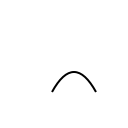

In [6]:
svg.translate(Point(10, 10))
print(svg)
show(svg)

ratio: 1.4545454545454546


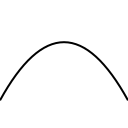

In [7]:
sample_dir = os.path.join(root_dir, "samples")
svg = SVG.load_svg(os.path.join(sample_dir, "bezier.svg"))
(x1, y1), (x2, y2) = svg.bbox()
# compute the ratio with respect to the image width and height (128, 128)
ratio = min(128 / (x2 - x1), 128 / (y2 - y1))
print("ratio:", ratio)
svg.scale(ratio)

center = (x1 + x2) / 2, (y1 + y2) / 2
svg.translate(Point(-center[0], -center[1]))
svg.translate(svg.viewbox.center)
show(svg)


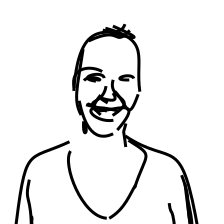

In [8]:
svg = SVG.load_svg(os.path.join(sample_dir, "complex", "alex.svg"))
show(svg, svg.width, svg.height)

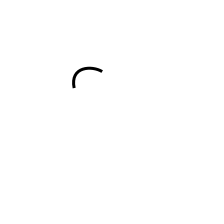

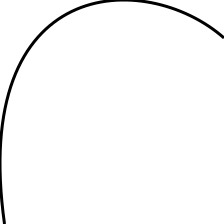

In [9]:
# try one path 
single = SVG([svg[1].copy()], svg.viewbox, width=svg.width, height=svg.height)    
show(single, svg.width, svg.height)
(x1, y1), (x2, y2) = single.bbox()
ratio = (single.width / (x2 - x1), single.height / (y2 - y1))

center = Point((x1 + x2) / 2, (y1 + y2) / 2)
single.translate(-center)
single.translate(single.viewbox.center)

single.scale(ratio)

show(single, single.width, single.height)


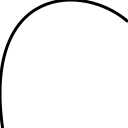

In [10]:
single.resize(128, 128)
show(single)

In [15]:
# try one path 
metadata = {"width":svg.width, "height": svg.height, "parts": {}}
svgs = []

for path_id in range(len(svg)):
    single = SVG([svg[path_id].copy()], svg.viewbox, width=svg.width, height=svg.height)    
    
    (x1, y1), (x2, y2) = single.bbox()

    ratio = (single.width / (x2 - x1), single.height / (y2 - y1))

    center = Point((x1 + x2) / 2, (y1 + y2) / 2)
    single.translate(-center)
    single.translate(single.viewbox.center)

    single.scale(ratio)
    
    metadata["parts"][f"part_{path_id}" ] = {
            "file": f"{path_id}.svg",
            "bounding_box": [float(x1), float(y1), float(x2), float(y2)]
        }   
    svgs.append(single)

    single.draw(
        file_path=os.path.join(sample_dir, "complex", f"{path_id}.svg"),
        do_display=False
    )
json.dump(metadata, open(os.path.join(sample_dir, "complex", "metadata.json"), "w"), indent=4)